# Building a Classifier for MNIST with K-Nearest Neighbors (KNN) and Hyperparameter Tuning

## Train a KNN Classifier on the MNIST Dataset

### The MNIST dataset is usually handled as a numpy array, so we do not use Pandas to load it mannually

### Loading and Splitting Data

#### The data we load was already splitted into the training and testing sets

In [2]:
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Exploring the Data

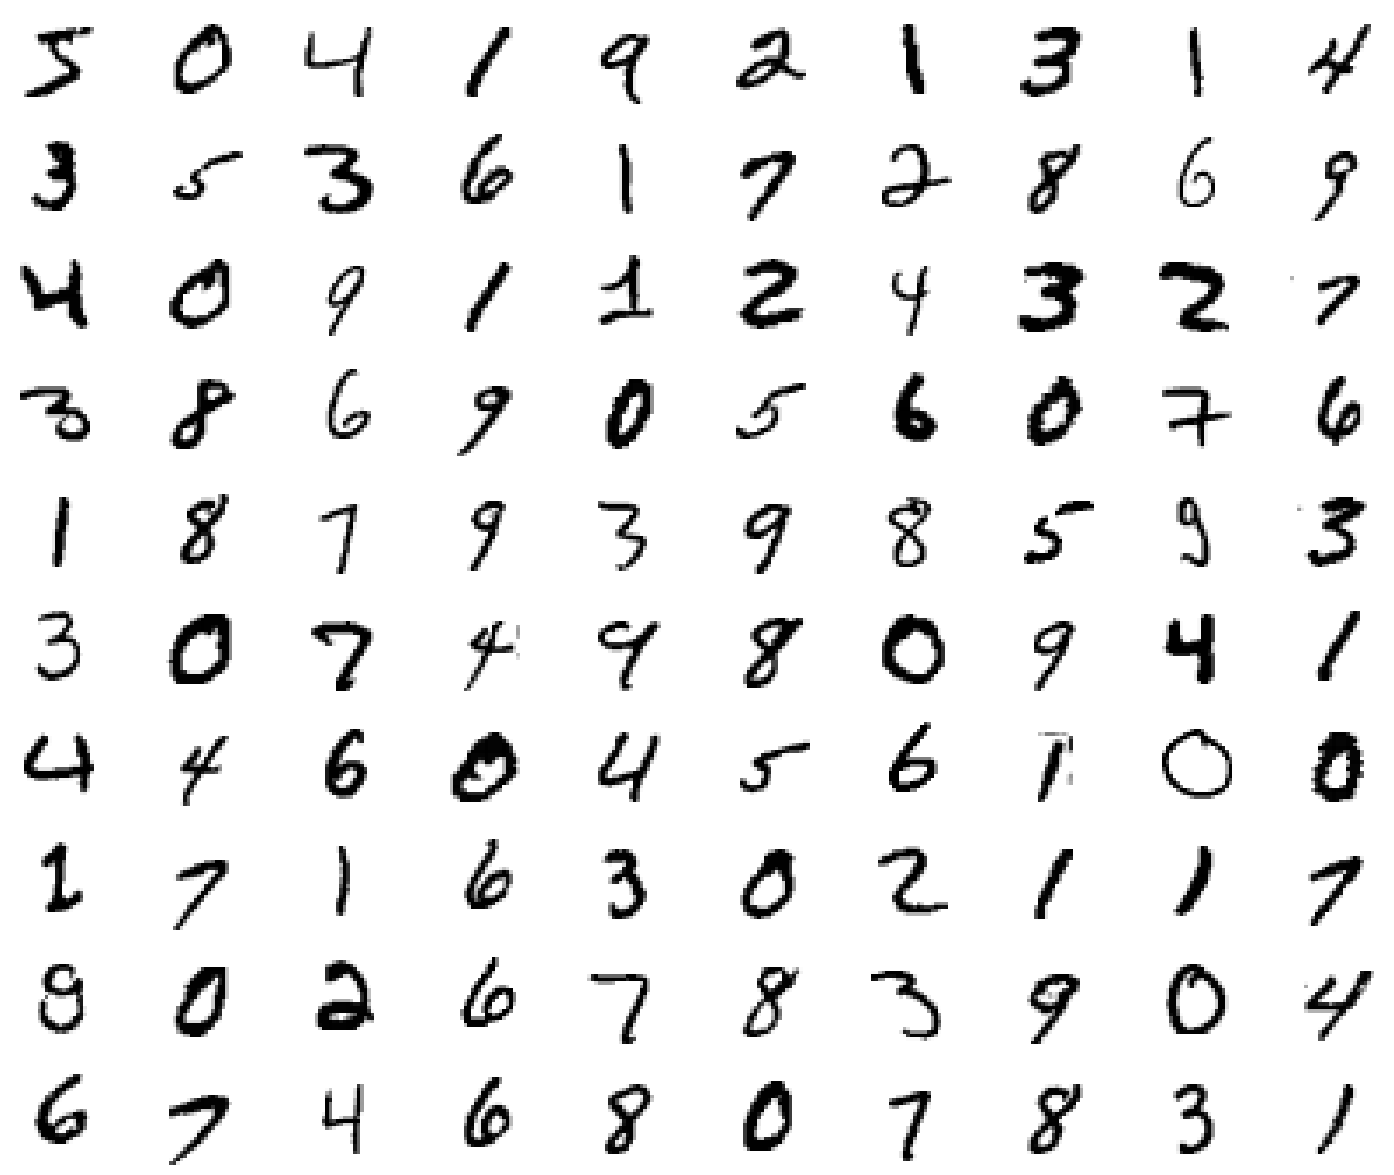

In [3]:
import matplotlib.pyplot as plt


def plot_digit(image_arrays):
    image_list = [item.reshape(28, 28) for item in image_arrays]
    images_num  = len(image_list)
    rows_num = images_num // 10 + (1 if images_num % 10 else 0)
    fig, axes = plt.subplots(rows_num , 10, figsize=(18, rows_num*1.5))
    axes = axes.ravel()
    for index in range(images_num):
        axes[index].imshow(image_list[index], cmap='binary')
        axes[index].axis('off')
    plt.show()


plot_digit(X[:100])

### Utility Function to Display a Confusion Matrix

In [4]:
import seaborn as sns
import numpy as np


def plot_confusion_matrix(cm, class_names, title='', cmap='Blues'):
    # Create a figure and axes
    plt.figure(figsize=(8, 6))

    # Plot the heatmap with seaborn
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True, xticklabels=class_names, yticklabels=class_names)

     # Set the plot labels and title
    plt.title(title, fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)

    plt.show()

def plot_learning_curve(classifier, X, y, cv=3, scoring='f1_macro', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1):
    # Generate learning curve data
    train_sizes, train_scores, val_scores = learning_curve(
        classifier, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring, n_jobs=n_jobs
    )

    # Calculate mean and standard deviation for train and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Plot the learning curve
    plt.figure()
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Plot learning curve with confidence intervals
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                    val_scores_mean + val_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.grid()
    plt.show()

### Training KNN Classifier

#### We train a K-Nearest Neighbors (KNN) model using the default hyperparameters, meaning we do not modify parameters like n_neighbors (which defaults to 5) or distance metrics. To evaluate the performance of this model within the training set, we employ stratified cross-validation using cross_val_predict. This method generates out-of-sample predictions for each instance, simulating a test scenario. For performance evaluation, we compute the confusion matrix, along with precision and recall as metrics. We use a macro-average approach to calculate precision and recall for each class separately and then average these values, treating all classes equally.

Precision:	96.97%
Recall: 	96.88%
F1-Score:	96.91%

Confusion Matrix:


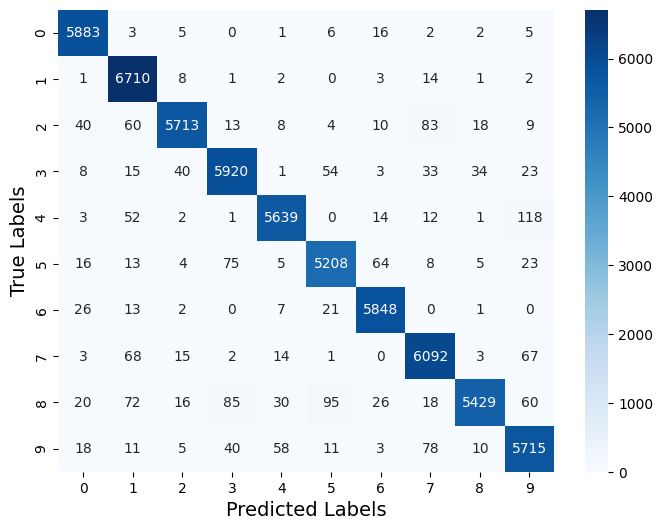

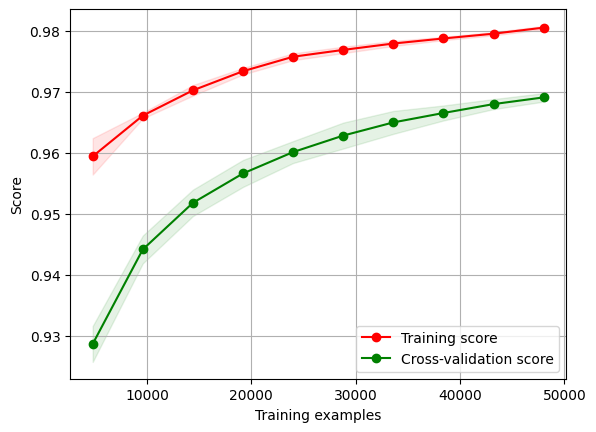

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits


# Initialize the KNN Classifier
neigh_clf = KNeighborsClassifier()

# Use StratifiedKFold for stratified cross-validation
skf = StratifiedKFold(n_splits=5)

# Compute predictions for each instance using stratified k-fold cross-validation
y_pred = cross_val_predict(neigh_clf, X_train, y_train, cv=skf)


labels = [f"{label}" for label in range(10)] # The classes of the digits are 0, 1, 2, ..., 9

# Calculate precision, recall, and F1-Score
precision = precision_score(y_true=y_train, y_pred=y_pred, average='macro')
recall = recall_score(y_true=y_train, y_pred=y_pred, average='macro')
f1_score_ = f1_score(y_true=y_train, y_pred=y_pred, average='macro')



print(f"Precision:\t{precision*100:.2f}%")
print(f"Recall: \t{recall*100:.2f}%")
print(f"F1-Score:\t{f1_score_*100:.2f}%")


# the confusion matrix in the ascending sorted order
print("\nConfusion Matrix:")
cm = confusion_matrix(y_train, y_pred, labels=labels)
plot_confusion_matrix(cm,class_names=labels)

# Plot the learning curve
plot_learning_curve(neigh_clf, X_train, y_train, cv=skf)

### Fine Tuning the Classifier with Grid Search

#### We employ Grid Search with Cross-Validation, which systematically explores various combinations of hyperparameter values, evaluates their impact on model performance using cross-validation, and ultimately identifies the best performing combination for our KNN classifier.

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_neighbors': [3, 4, 5, 6],
    'weights': ['uniform','distance'],
}

neigh_clf = KNeighborsClassifier()

grid_search = GridSearchCV(
    neigh_clf,
    param_grid=param_grid,
    cv=skf,
    scoring='f1_macro',
    verbose=2,
)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .....................n_neighbors=3, weights=uniform; total time=  15.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=  13.9s
[CV] END .....................n_neighbors=3, weights=uniform; total time=  11.6s
[CV] END .....................n_neighbors=3, weights=uniform; total time=  12.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=  12.1s
[CV] END ....................n_neighbors=3, weights=distance; total time=  11.2s
[CV] END ....................n_neighbors=3, weights=distance; total time=  11.5s
[CV] END ....................n_neighbors=3, weights=distance; total time=  11.1s
[CV] END ....................n_neighbors=3, weights=distance; total time=  10.8s
[CV] END ....................n_neighbors=3, weights=distance; total time=  11.2s
[CV] END .....................n_neighbors=4, weights=uniform; total time=  11.3s
[CV] END .....................n_neighbors=4, weig

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
skf = StratifiedKFold(n_splits=5)
labels = [f"{label}" for label in range(10)]

#### Assessing the Optimal Model with the Train Set

Precision:	97.19%
Recall: 	97.12%
F1-Score:	97.14%

Confusion Matrix:


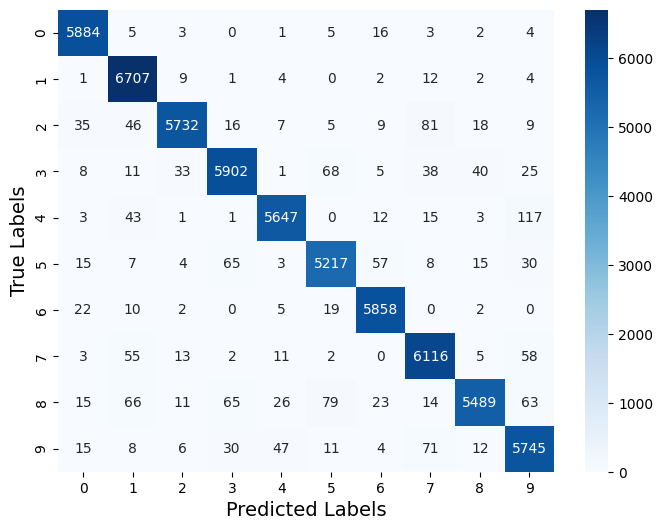

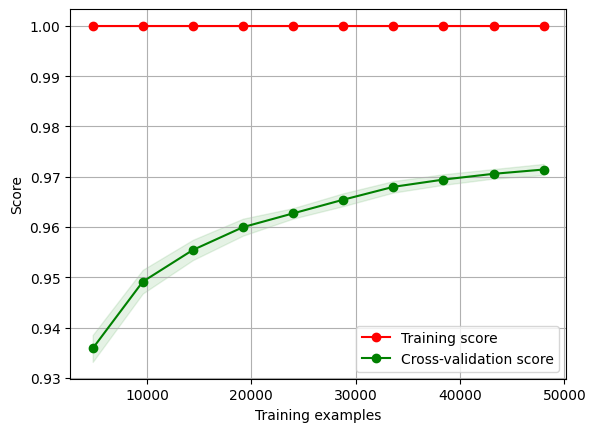

In [10]:
neigh_clf_tuned = KNeighborsClassifier(n_neighbors=4, weights='distance')

y_pred = cross_val_predict(neigh_clf_tuned, X_train, y_train, cv=skf)


neigh_clf_tuned.fit(X_train, y_train)

# Calculate precision, recall, and F1-Score
precision = precision_score(y_true=y_train, y_pred=y_pred, average='macro')
recall = recall_score(y_true=y_train, y_pred=y_pred, average='macro')
f1_score_ = f1_score(y_true=y_train, y_pred=y_pred, average='macro')



print(f"Precision:\t{precision*100:.2f}%")
print(f"Recall: \t{recall*100:.2f}%")
print(f"F1-Score:\t{f1_score_*100:.2f}%")


#Confusion MAtrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_train, y_pred, labels=labels)
plot_confusion_matrix(cm, class_names= labels)

# Plot the learning curve
plot_learning_curve(neigh_clf_tuned, X_train, y_train, cv=skf)

#### Assessing the Optimal Model with the Test Set

Precision:	97.16%
Recall: 	97.11%
F1-Score:	97.12%

Confusion Matrix:


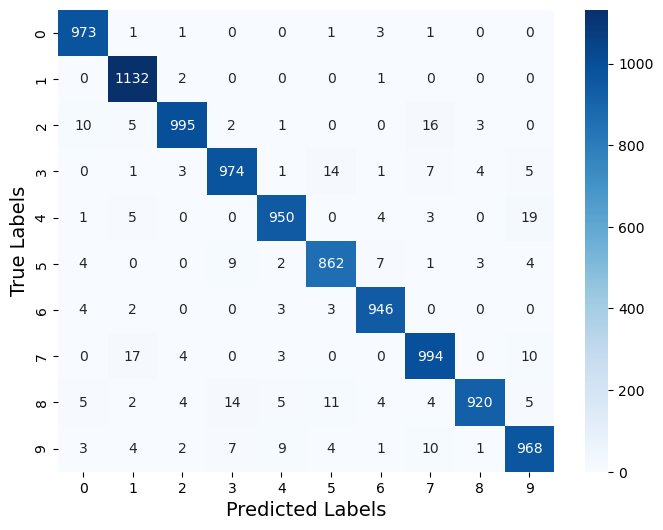

In [ ]:
y_pred_test = neigh_clf_tuned.predict(X_test)

# Calculate precision, recall, and F1-Score
precision = precision_score(y_true=y_test, y_pred=y_pred_test, average='macro')
recall = recall_score(y_true=y_test, y_pred=y_pred_test, average='macro')
f1_score_ = f1_score(y_true=y_test, y_pred=y_pred_test, average='macro')

print(f"Precision:\t{precision*100:.2f}%")
print(f"Recall: \t{recall*100:.2f}%")
print(f"F1-Score:\t{f1_score_*100:.2f}%")

#Confusion MAtrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_test, labels=labels)
plot_confusion_matrix(cm, class_names= labels)


###  SGD Classifier

#### Fine Tuning SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier


# Initialize the SGD classifier
sgd_clf = SGDClassifier(random_state=42)

param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
    'loss': ['hinge', 'log_loss'],  # SVM or Logistic Regression loss
    'max_iter': [2000]
}
skf = StratifiedKFold(n_splits=3)
sgd_search = GridSearchCV(sgd_clf, param_grid=param_grid, scoring='f1_macro', cv=skf, verbose=2)
sgd_search.fit(X_train, y_train)
sgd_search.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ............alpha=0.0001, loss=hinge, max_iter=2000; total time=  47.6s
[CV] END ............alpha=0.0001, loss=hinge, max_iter=2000; total time=  38.2s
[CV] END ............alpha=0.0001, loss=hinge, max_iter=2000; total time=  38.0s
[CV] END .........alpha=0.0001, loss=log_loss, max_iter=2000; total time=  43.1s
[CV] END .........alpha=0.0001, loss=log_loss, max_iter=2000; total time=  39.9s
[CV] END .........alpha=0.0001, loss=log_loss, max_iter=2000; total time=  45.1s
[CV] END .............alpha=0.001, loss=hinge, max_iter=2000; total time=  41.3s
[CV] END .............alpha=0.001, loss=hinge, max_iter=2000; total time=  42.1s
[CV] END .............alpha=0.001, loss=hinge, max_iter=2000; total time=  40.8s
[CV] END ..........alpha=0.001, loss=log_loss, max_iter=2000; total time=  44.6s
[CV] END ..........alpha=0.001, loss=log_loss, max_iter=2000; total time=  42.4s
[CV] END ..........alpha=0.001, loss=log_loss, ma

{'alpha': 0.0001, 'loss': 'log_loss', 'max_iter': 2000}

Precision:	86.32%
Recall: 	86.09%
F1-Score:	86.03%

Confusion Matrix:


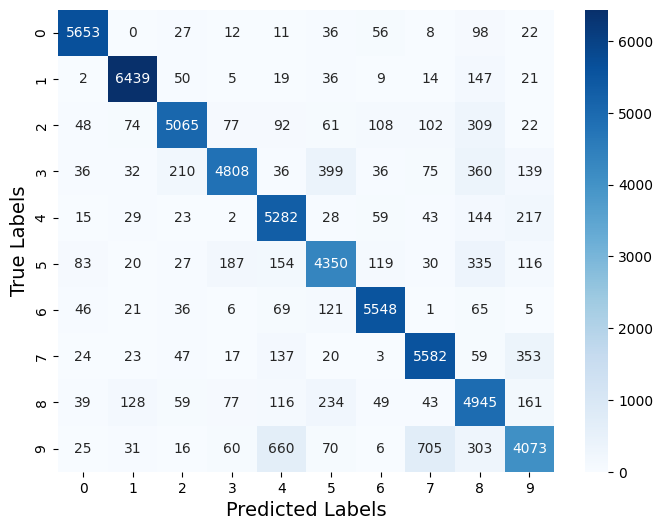

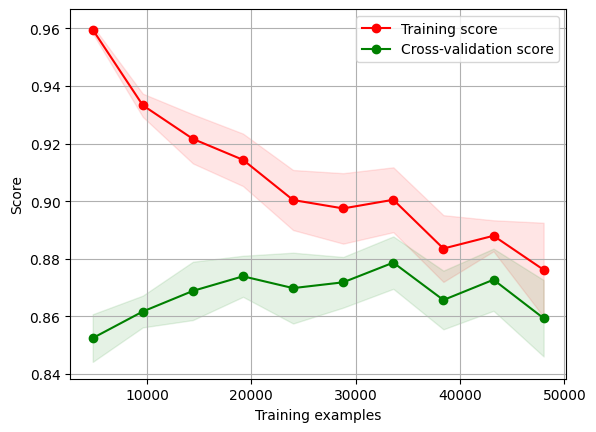

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf_tuned = SGDClassifier(alpha=0.0001, loss='log_loss', max_iter=2000, random_state=42)
sgd_clf_tuned.fit(X_train, y_train)
y_pred = sgd_clf_tuned.predict(X_test)

 # alculate precision, recall, and F1-Score
precision = precision_score(y_true=y_test, y_pred=y_pred, average='macro')
recall = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
f1_score_ = f1_score(y_true=y_test, y_pred=y_pred, average='macro')


# Calculate precision, recall, and F1-Score
print(f"Precision:\t{precision*100:.2f}%")
print(f"Recall: \t{recall*100:.2f}%")
print(f"F1-Score:\t{f1_score_*100:.2f}%")


#Confusion MAtrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_train, y_pred, labels=labels)
plot_confusion_matrix(cm, class_names= labels)

# Plot the learning curve
plot_learning_curve(sgd_clf_tuned, X_train, y_train, cv=skf)

Precision:	97.04%
Recall: 	97.03%
F1-Score:	97.03%


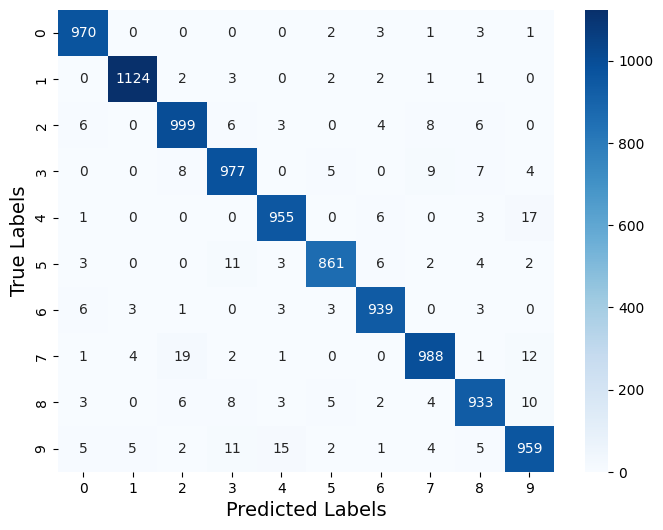

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


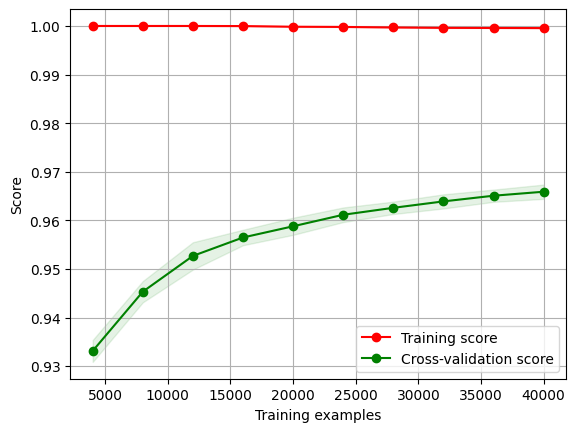

In [12]:
from sklearn.ensemble import RandomForestClassifier


# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(
    max_depth=20,
    max_features='sqrt',
    n_estimators=400,
    random_state=42
)


# Fit the model
rf_clf.fit(X_train, y_train)

# prediction for the test set
y_pred = rf_clf.predict(X_test)


# Calculate precision, recall, and F1-Score
precision = precision_score(y_true=y_test, y_pred=y_pred, average='macro')
recall = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
f1_score_ = f1_score(y_true=y_test, y_pred=y_pred, average='macro')


print(f"Precision:\t{precision*100:.2f}%")
print(f"Recall: \t{recall*100:.2f}%")
print(f"F1-Score:\t{f1_score_*100:.2f}%")

plot_confusion_matrix(confusion_matrix(y_test, y_pred, labels=labels), class_names=labels)
plot_learning_curve(rf_clf, X_train, y_train, cv=3)